## Question

Prepare a classification model using SVM for salary data 

**Data Description:**

+ age -- age of a person
+ workclass	-- A work class is a grouping of work 
+ education	-- Education of an individuals	
+ maritalstatus -- Marital status of an individulas	
+ occupation	 -- occupation of an individuals
+ relationship --role in family 	
+ race --  Race of an Individual
+ sex --  Gender of an Individual
+ capitalgain --  profit received from the sale of an investment	
+ capitalloss	-- A decrease in the value of a capital asset
+ hoursperweek -- number of hours work per week	
+ native -- Native of an individual
+ Salary -- salary of an individual

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_data=pd.read_csv('SalaryData_Train(1).csv')
train_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
train_data.shape

(30161, 14)

In [4]:
test_data=pd.read_csv('SalaryData_Test(1).csv')
test_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [5]:
test_data.shape

(15060, 14)

In [6]:
# Concatenate train and test datasets for preprocessing
Salary_data=pd.concat([train_data,test_data],axis=0)
Salary_data.head(3)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


## Data Understanding

In [7]:
Salary_data.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [8]:
Salary_data.shape

(45221, 14)

In [9]:
Salary_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45221 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            45221 non-null  int64 
 1   workclass      45221 non-null  object
 2   education      45221 non-null  object
 3   educationno    45221 non-null  int64 
 4   maritalstatus  45221 non-null  object
 5   occupation     45221 non-null  object
 6   relationship   45221 non-null  object
 7   race           45221 non-null  object
 8   sex            45221 non-null  object
 9   capitalgain    45221 non-null  int64 
 10  capitalloss    45221 non-null  int64 
 11  hoursperweek   45221 non-null  int64 
 12  native         45221 non-null  object
 13  Salary         45221 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.2+ MB


In [10]:
Salary_data.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [11]:
Salary_data.duplicated().sum()

5982

In [12]:
Salary_data.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000
mean,38.548086,10.118463,1101.454700,88.548617,40.938038
std,13.217981,2.552909,7506.511295,404.838249,12.007640
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [13]:
# Identify numeric variables
numeric_variables=Salary_data.select_dtypes(include=['int','float']).columns.tolist()

# Categorize numeric variables as discrete or continuous
discrete_variables=[]
continuous_variables=[]

for col in numeric_variables:
    unique_count=Salary_data[col].nunique()
    if unique_count <=25:  # Set a threshold to categorize as discrete
        discrete_variables.append(col)
    else:
        continuous_variables.append(col)

# Print the categorized variables
print("Discrete Variables:", discrete_variables)
print("Continuous Variables:", continuous_variables)

Discrete Variables: ['educationno']
Continuous Variables: ['age', 'capitalgain', 'capitalloss', 'hoursperweek']


In [14]:
# Identify categorical variables
categorical_variables=Salary_data.select_dtypes(include=['object','bool']).columns.tolist()

print("Categorical Variables:", categorical_variables)

Categorical Variables: ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native', 'Salary']


In [15]:
# Compute frequency counts for each categorical column
frequency_counts={}
for col in categorical_variables:
    frequency_counts[col]=Salary_data[col].value_counts()

# Print frequency counts for each categorical column
for col, counts in frequency_counts.items():
    print(f"Frequency count for '{col}' column:")
    print(counts)
    print()

Frequency count for 'workclass' column:
 Private             33306
 Self-emp-not-inc     3796
 Local-gov            3100
 State-gov            1946
 Self-emp-inc         1646
 Federal-gov          1406
 Without-pay            21
Name: workclass, dtype: int64

Frequency count for 'education' column:
 HS-grad         14783
 Some-college     9898
 Bachelors        7570
 Masters          2514
 Assoc-voc        1959
 11th             1619
 Assoc-acdm       1507
 10th             1223
 7th-8th           823
 Prof-school       785
 9th               676
 12th              577
 Doctorate         544
 5th-6th           449
 1st-4th           222
 Preschool          72
Name: education, dtype: int64

Frequency count for 'maritalstatus' column:
 Married-civ-spouse       21055
 Never-married            14597
 Divorced                  6297
 Separated                 1411
 Widowed                   1277
 Married-spouse-absent      552
 Married-AF-spouse           32
Name: maritalstatus, dtype: int64

In [16]:
# Calculate cardinality for each categorical column
cardinality={}
for col in categorical_variables:
    cardinality[col]=Salary_data[col].nunique()

# Print cardinality for each categorical column
for col, card in cardinality.items():
    print(f"Cardinality for '{col}' column:", card)

Cardinality for 'workclass' column: 7
Cardinality for 'education' column: 16
Cardinality for 'maritalstatus' column: 7
Cardinality for 'occupation' column: 14
Cardinality for 'relationship' column: 6
Cardinality for 'race' column: 5
Cardinality for 'sex' column: 2
Cardinality for 'native' column: 40
Cardinality for 'Salary' column: 2


In [17]:
Salary_data.corr()

,age,educationno,capitalgain,capitalloss,hoursperweek
age,1.000000,0.037623,0.079682,0.059426,0.101992
educationno,0.037623,1.000000,0.126907,0.081741,0.146206
capitalgain,0.079682,0.126907,1.000000,-0.032095,0.083880
capitalloss,0.059426,0.081741,-0.032095,1.000000,0.054220
hoursperweek,0.101992,0.146206,0.083880,0.054220,1.000000


**Observations**

+ Dataset contain 45221 rows and 14 columns.
+ The column 'educationno' is of no use, so we can drop it during pre-processing.
+ The values in the dataset are integer and object type.
+ No null values are present.
+ There are 5 numerical columns, in that 4 columns are continuous and 1 is discrete column.
+ 9 columns are categorical.

## Data Visualiztion

(array([0.5, 1.5, 2.5, 3.5, 4.5]),
 [Text(0.5, 0, 'age'),
  Text(1.5, 0, 'educationno'),
  Text(2.5, 0, 'capitalgain'),
  Text(3.5, 0, 'capitalloss'),
  Text(4.5, 0, 'hoursperweek')])

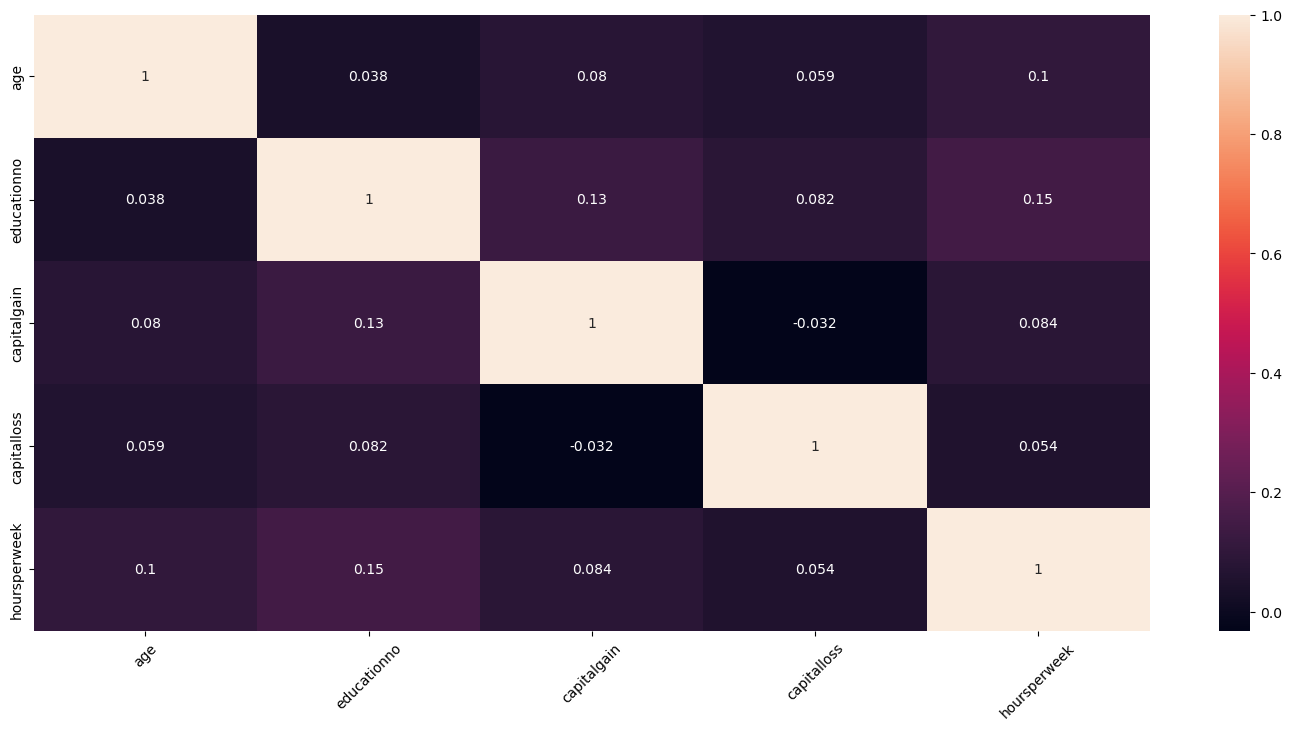

In [18]:
fig=plt.figure(figsize=(18,8))
sns.heatmap(Salary_data.corr(),annot=True);
plt.xticks(rotation=45)

Negative cor-relation between Capital loss and Capital gain.

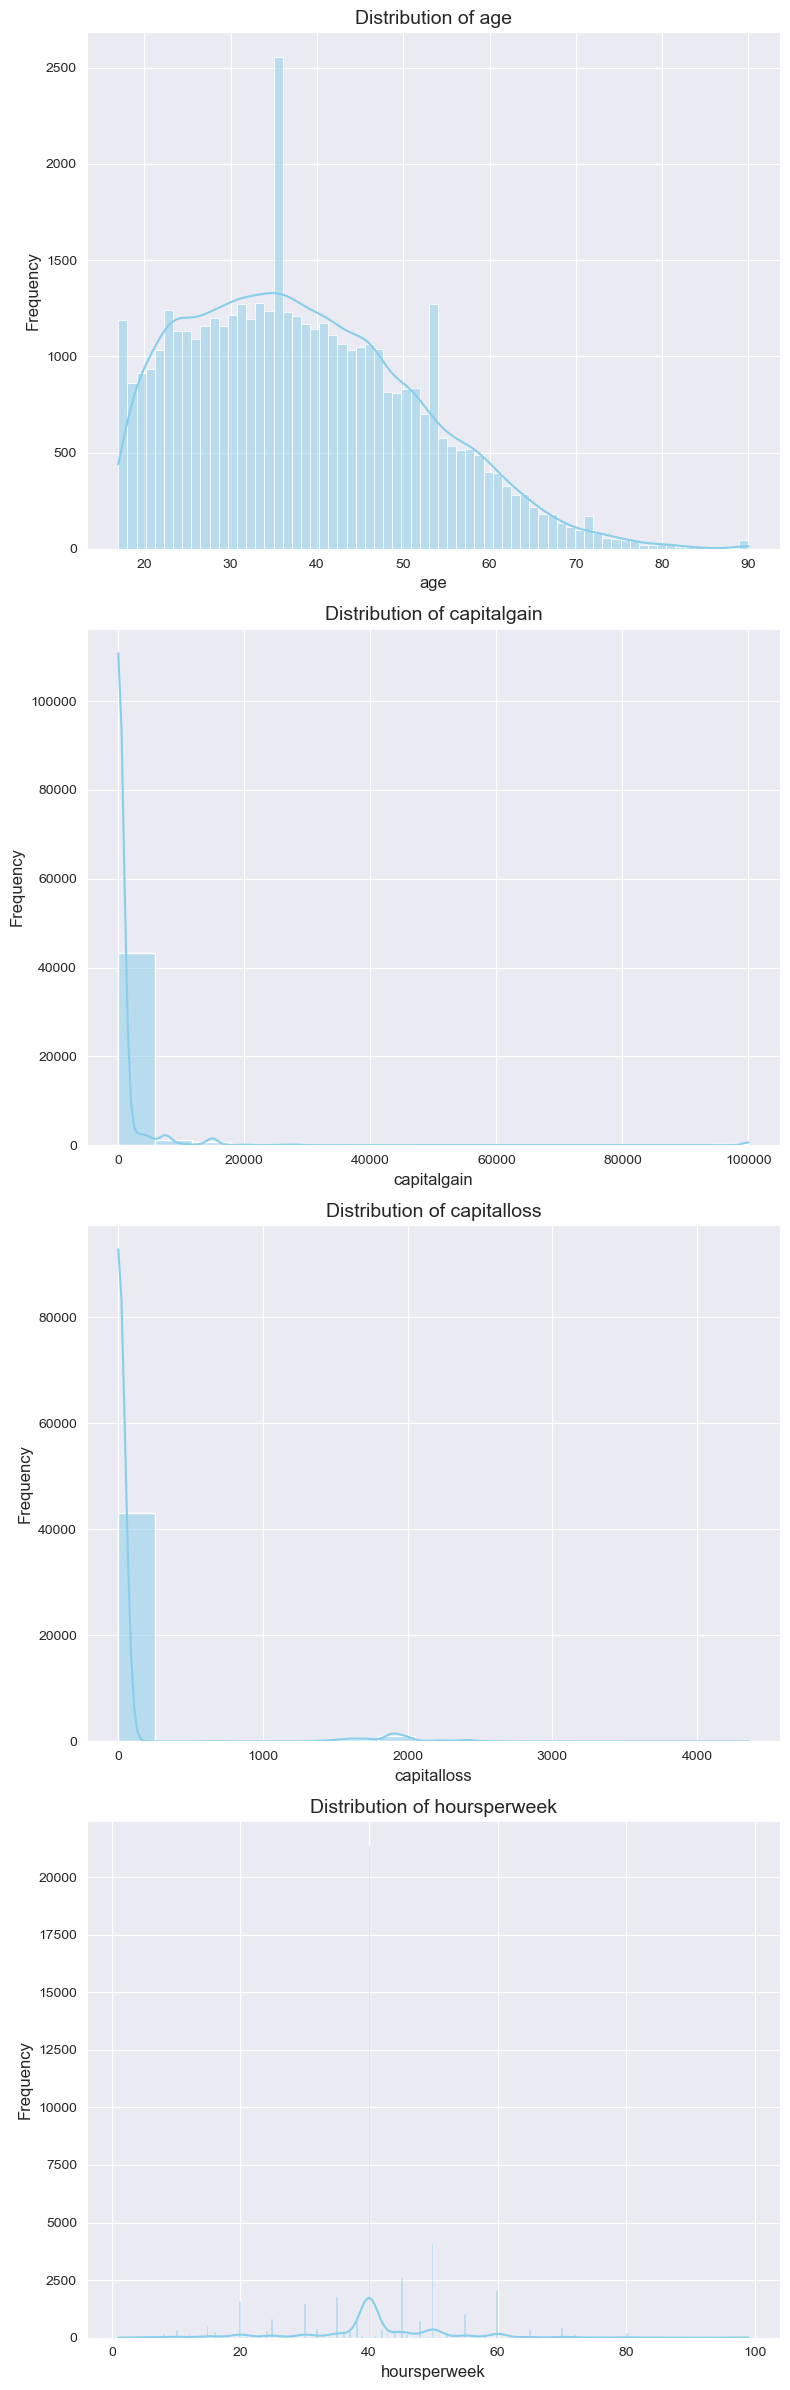

In [20]:
# Create subplots
fig,axes=plt.subplots(nrows=len(continuous_variables),figsize=(8,6 * len(continuous_variables)))

# Loop through each continuous column and create a distribution plot
for col,ax in zip(continuous_variables,axes):
    sns.histplot(Salary_data[col],ax=ax,kde=True,color='skyblue')
    ax.set_title(f'Distribution of {col}',fontsize=14)
    ax.set_xlabel(col,fontsize=12)
    ax.set_ylabel('Frequency',fontsize=12)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

+ 3 columns are positively skewed and the hoursperweek column is symmetric.
+ Most of the employees are between the age group of 20-60.

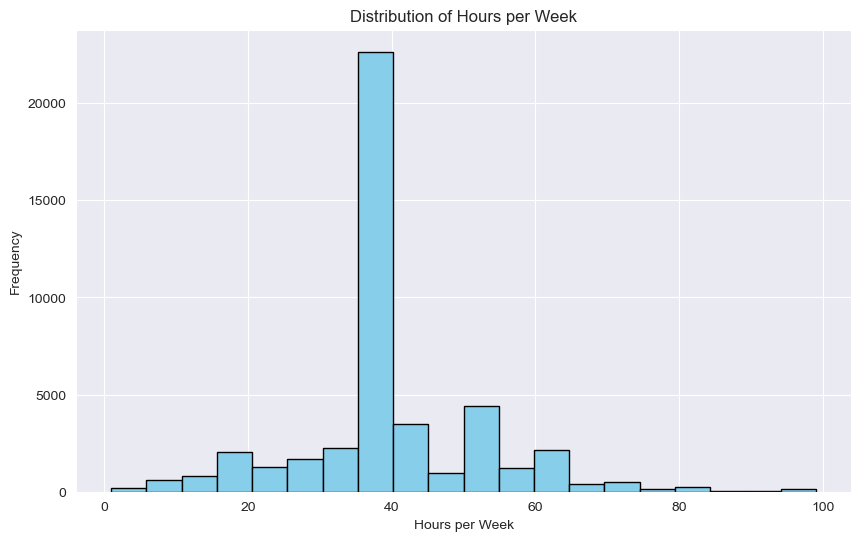

In [22]:
# Plotting discrete column
plt.figure(figsize=(10, 6))
plt.hist(Salary_data['hoursperweek'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Hours per Week')
plt.xlabel('Hours per Week')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Most of the employees are working 40 hours per week.

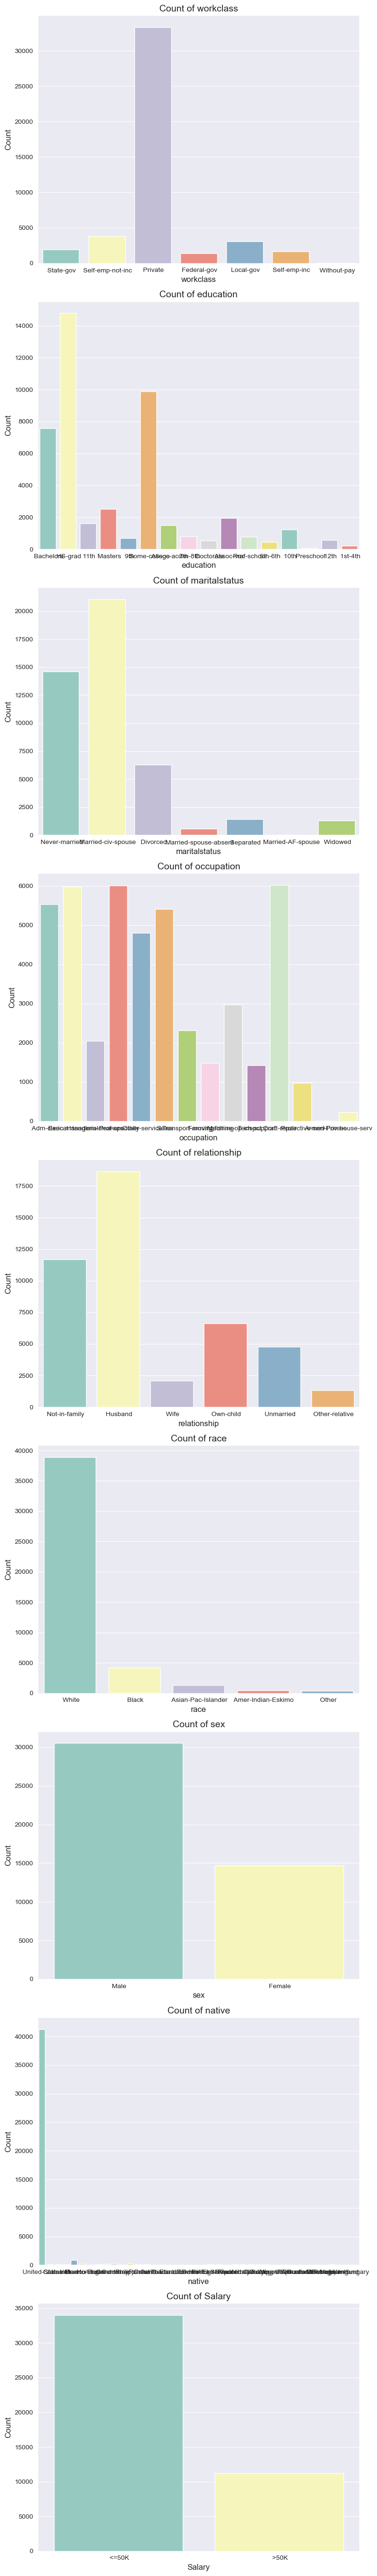

In [23]:
# Create subplots
fig,axes=plt.subplots(nrows=len(categorical_variables),figsize=(8,6 * len(categorical_variables)))

# Loop through each categorical column and create a count plot
for col,ax in zip(categorical_variables,axes):
    sns.countplot(data=Salary_data, x=col, ax=ax, palette='Set3')
    ax.set_title(f'Count of {col}', fontsize=14)
    ax.set_xlabel(col, fontsize=12)
    ax.set_ylabel('Count', fontsize=12)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

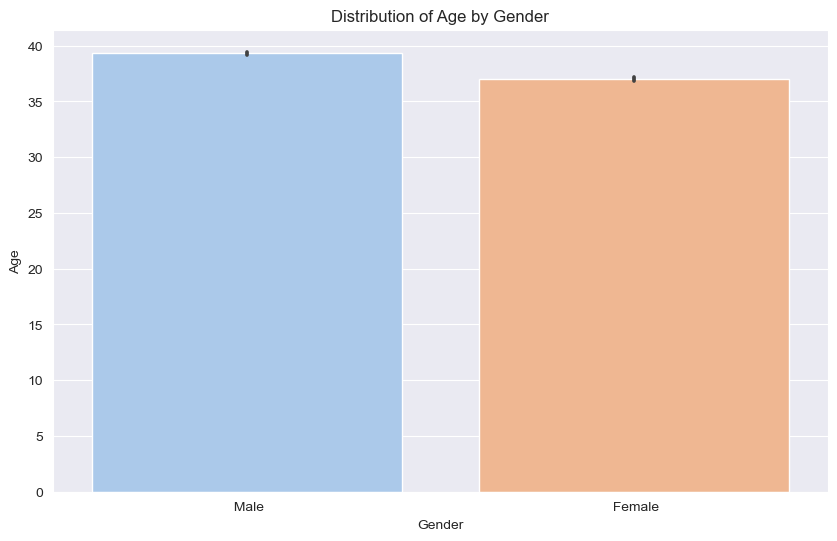

In [26]:
# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='sex', y='age', data=Salary_data, palette='pastel')
plt.title('Distribution of Age by Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()

On a average, working ages for male is 39 and for female is 36.

<Figure size 1400x600 with 0 Axes>

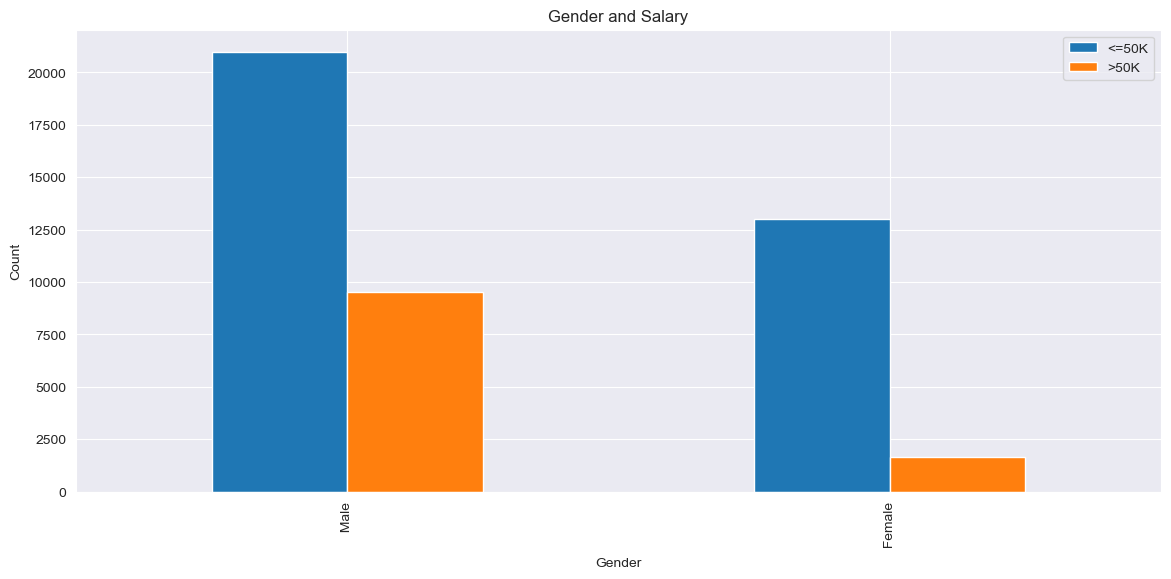

In [28]:
# Create a DataFrame to store the counts of 'Salary' categories based on 'sex'
Ss= pd.DataFrame()
Ss['<=50K']=Salary_data[Salary_data['Salary'] ==' <=50K']['sex'].value_counts()
Ss['>50K']=Salary_data[Salary_data['Salary'] == ' >50K']['sex'].value_counts()

# Plotting
plt.figure(figsize=(14, 6))
Ss.plot(kind='bar', title='Gender and Salary', figsize=(14, 6))
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

<Figure size 1400x600 with 0 Axes>

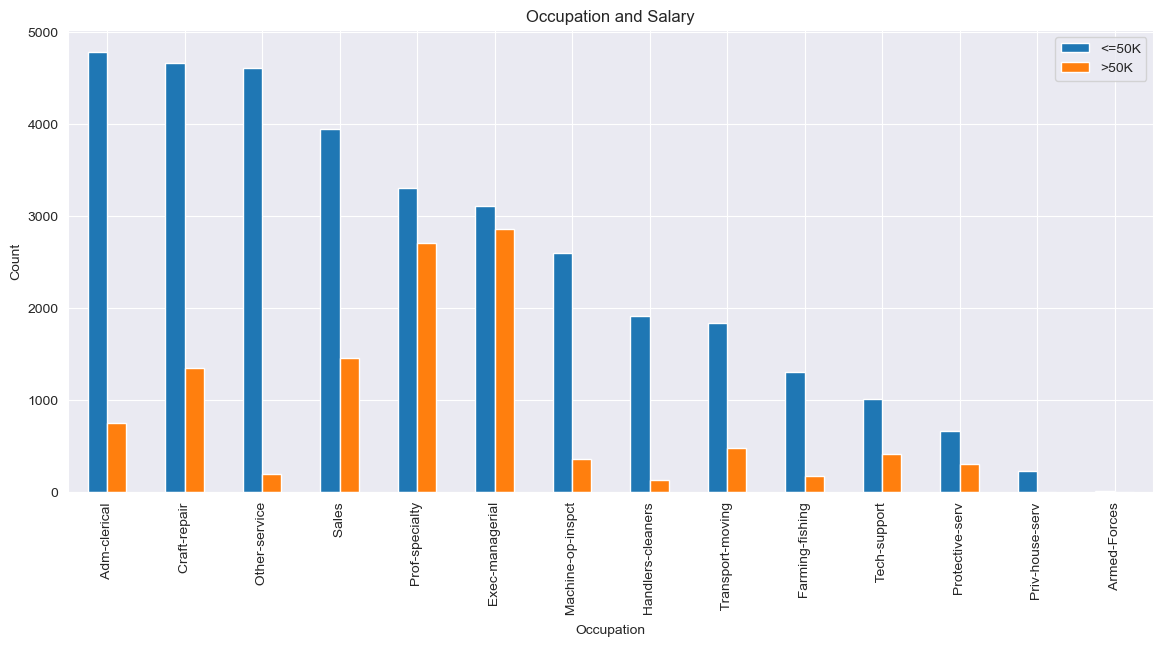

In [29]:
# Create a DataFrame to store the counts of 'Salary' categories based on 'occupation'
Ss=pd.DataFrame()
Ss['<=50K'] =Salary_data[Salary_data['Salary'] == ' <=50K']['occupation'].value_counts()
Ss['>50K'] =Salary_data[Salary_data['Salary'] == ' >50K']['occupation'].value_counts()

# Plotting bar chart
plt.figure(figsize=(14, 6))
Ss.plot(kind='bar', title='Occupation and Salary', figsize=(14, 6))
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.show()

<Figure size 1400x600 with 0 Axes>

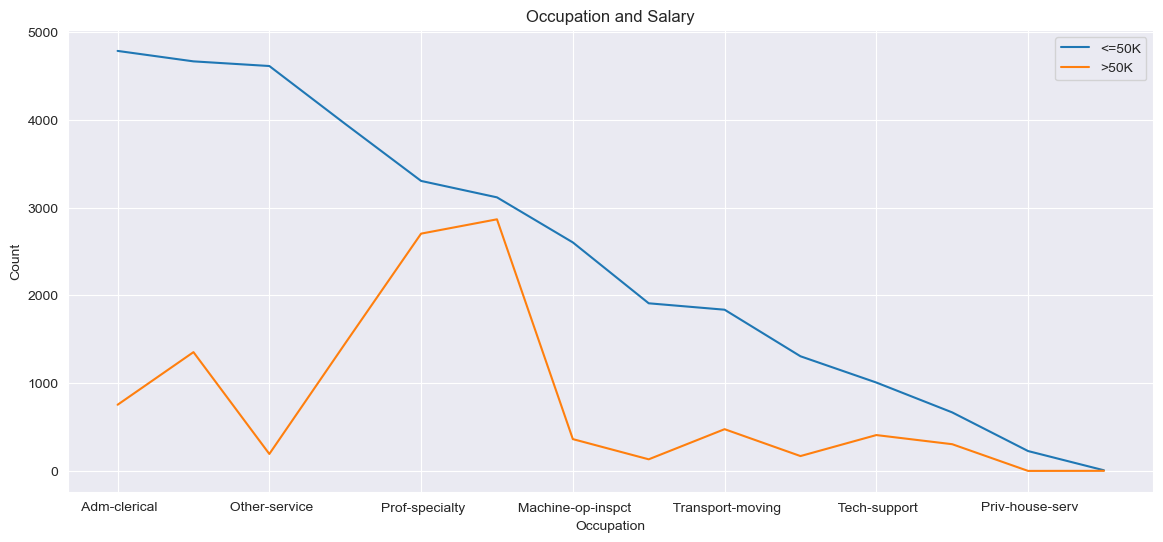

In [30]:
# Plotting line chart (optional, if needed)
plt.figure(figsize=(14, 6))
Ss.plot(title='Occupation and Salary', figsize=(14, 6))
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.show()

<Figure size 1200x600 with 0 Axes>

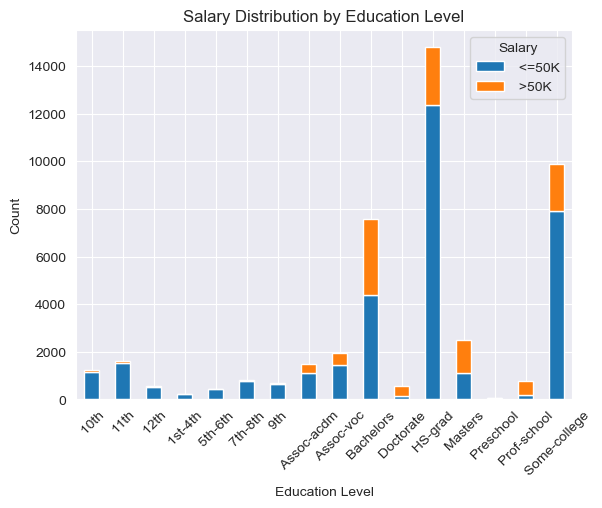

In [31]:
# Plotting
plt.figure(figsize=(12, 6))
Salary_data.groupby(['education', 'Salary']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Salary Distribution by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.legend(title='Salary')
plt.show()

<Figure size 1200x600 with 0 Axes>

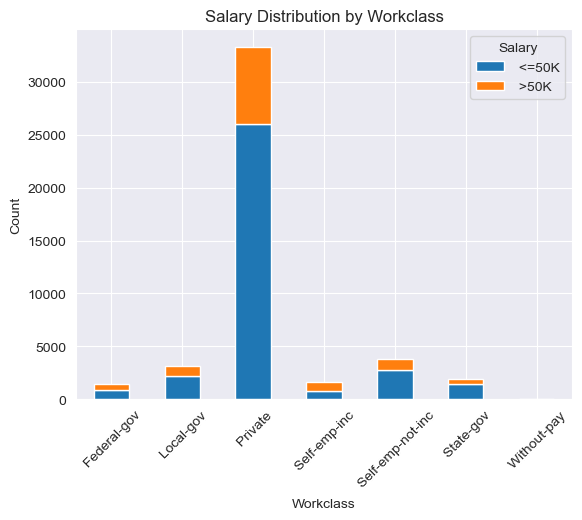

In [32]:
# Plotting
plt.figure(figsize=(12, 6))
Salary_data.groupby(['workclass', 'Salary']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Salary Distribution by Workclass')
plt.xlabel('Workclass')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.legend(title='Salary')
plt.show()

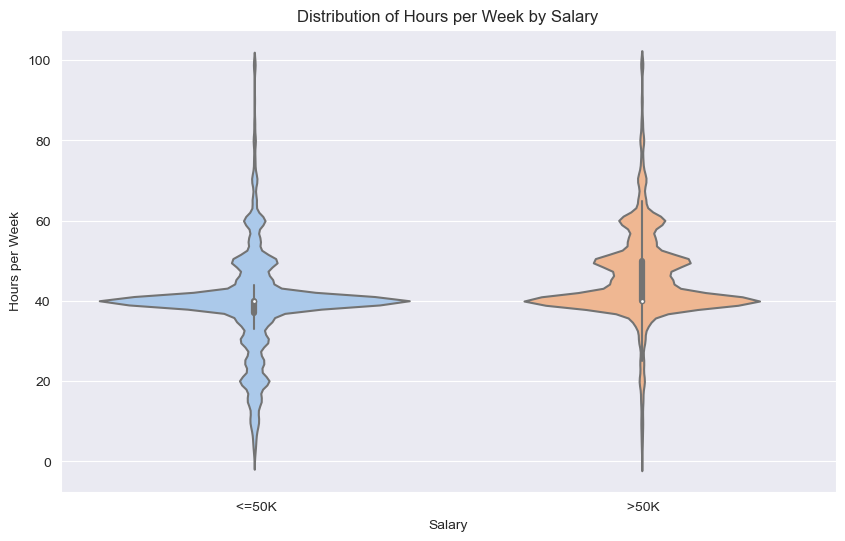

In [33]:
# Plotting
plt.figure(figsize=(10, 6))
sns.violinplot(x='Salary', y='hoursperweek', data=Salary_data, palette='pastel')
plt.title('Distribution of Hours per Week by Salary')
plt.xlabel('Salary')
plt.ylabel('Hours per Week')
plt.show()

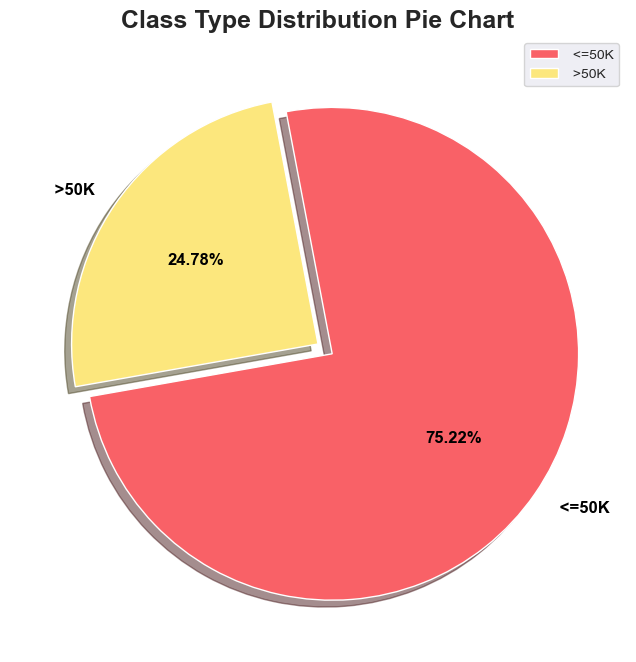

In [35]:
plt.figure(figsize=(12,8))
plt.pie(Salary_data['Salary'].value_counts(),
       labels=Salary_data.Salary.unique(),
       explode=[0.07,0.0],
       autopct='%.2f%%',
        colors=["#F96167", "#FCE77D"],
       shadow=True,
       startangle=190,
       textprops={'size':'large',
                   'fontweight':'bold',
                    'rotation':'0',
                   'color':'black'})
plt.legend(loc= 'upper right')
plt.title("Class Type Distribution Pie Chart", fontsize = 18, fontweight = 'bold')
plt.show()

The data is imbalanced.

## Data Pre-processing

In [34]:
# Dropping the 'educationno' column
Salary_data.drop(columns=['educationno'], inplace=True)  # inplace=True modifies the DataFrame in-place
Salary_data.head(2)

,age,workclass,education,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


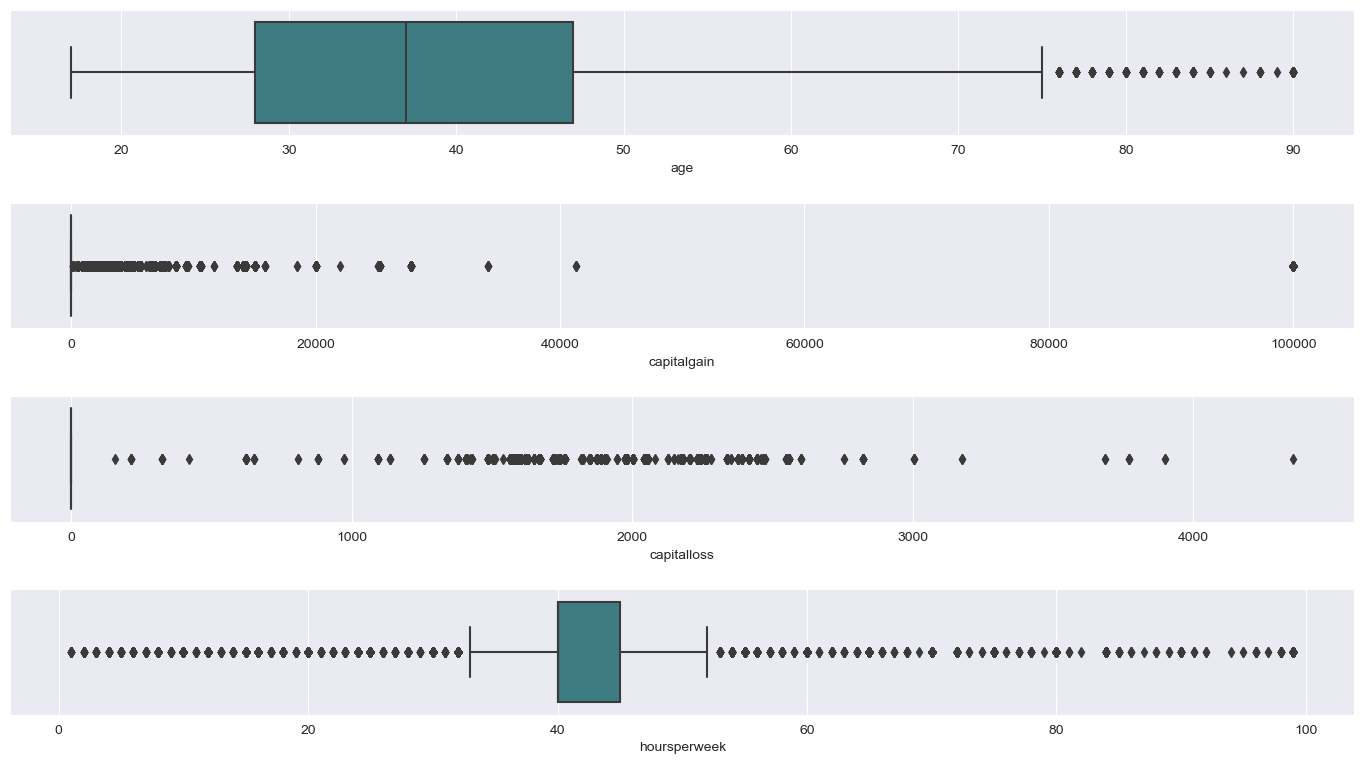

In [36]:
fig, axes=plt.subplots(4,1,figsize=(14,8),sharex=False,sharey=False)
sns.boxplot(x='age',data=Salary_data,palette='crest',ax=axes[0])
sns.boxplot(x='capitalgain',data=Salary_data,palette='crest',ax=axes[1])
sns.boxplot(x='capitalloss',data=Salary_data,palette='crest',ax=axes[2])
sns.boxplot(x='hoursperweek',data=Salary_data,palette='crest',ax=axes[3])
plt.tight_layout(pad=2.0)

Outliers are present in the dataframe but we can't drop them because they are present in a very large quantity and can be important for model building.

In [37]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder=LabelEncoder()

# Apply label encoding to each categorical column
for col in ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native']:
    Salary_data[col]=label_encoder.fit_transform(Salary_data[col])

In [38]:
Salary_data['Salary']=np.where(Salary_data['Salary'].str.contains(" >50K"), 1, 0)
Salary_data.head()

,age,workclass,education,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,2,3,0,4,1,0,0,13,37,0
2,38,2,11,0,5,1,4,1,0,0,40,37,0
3,53,2,1,2,5,0,2,1,0,0,40,37,0
4,28,2,9,2,9,5,2,0,0,0,40,4,0


In [39]:
from sklearn.preprocessing import StandardScaler
# Initialize StandardScaler
scaler = StandardScaler()

# Standardize continuous variables
Salary_data[continuous_variables]=scaler.fit_transform(Salary_data[continuous_variables])

# Display the DataFrame after standardization
print(Salary_data)

            age  workclass  education  maritalstatus  occupation  \
0      0.034190          5          9              4           0   
1      0.866399          4          9              2           3   
2     -0.041466          2         11              0           5   
3      1.093365          2          1              2           5   
4     -0.798019          2          9              2           9   
...         ...        ...        ...            ...         ...   
15055 -0.419742          2          9              4           9   
15056  0.034190          2          9              0           9   
15057 -0.041466          2          9              2           9   
15058  0.412467          2          9              0           0   
15059 -0.268432          3          9              2           3   

       relationship  race  sex  capitalgain  capitalloss  hoursperweek  \
0                 1     4    1     0.142884    -0.218728     -0.078121   
1                 0     4    1    -

## Data Splitting, Training, Modelling & Predicting

In [40]:
X=Salary_data.drop('Salary',axis=1)
y=Salary_data['Salary']

In [41]:
from sklearn.model_selection import train_test_split  
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [42]:
# Perform train-test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [43]:
# Train the SVM model
svm_model=SVC(kernel='rbf',random_state=42)
svm_model.fit(X_train,y_train)

SVC(random_state=42)

In [44]:
# Predictions
y_pred=svm_model.predict(X_test)

In [45]:
# Model evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[6613  193]
 [1660  579]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.97      0.88      6806
           1       0.75      0.26      0.38      2239

    accuracy                           0.80      9045
   macro avg       0.77      0.62      0.63      9045
weighted avg       0.79      0.80      0.76      9045



We got an accuracy of 80%.But as we see above the data is imbalanced so our result get biased towards the majority.

The model is correctly classifying all the majority classes yet fails to classify the minority classes. Hence, we need to use some kind of oversampling techniques to balance the dataset.

## Handling Imbalanced Data

**1.Resampling**

In [46]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [47]:
# RandomOverSampler for over-sampling
oversampler=RandomOverSampler(random_state=42)
X_train_resampled,y_train_resampled=oversampler.fit_resample(X_train,y_train)

In [48]:
OSsvm_model=SVC(kernel='rbf',random_state=42)
OSsvm_model.fit(X_train_resampled,y_train_resampled)

SVC(random_state=42)

In [49]:
# Predictions
y_predOS=OSsvm_model.predict(X_test)

In [50]:
# Model evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_predOS))
print("\nClassification Report:")
print(classification_report(y_test, y_predOS))

Confusion Matrix:
[[4604 2202]
 [ 333 1906]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.68      0.78      6806
           1       0.46      0.85      0.60      2239

    accuracy                           0.72      9045
   macro avg       0.70      0.76      0.69      9045
weighted avg       0.82      0.72      0.74      9045



In [51]:
# RandomUnderSampler for under-sampling
undersampler=RandomUnderSampler(random_state=42)
X_train_undersampled,y_train_undersampled=undersampler.fit_resample(X_train, y_train)

In [52]:
USsvm_model=SVC(kernel='rbf',random_state=42)
USsvm_model.fit(X_train_undersampled,y_train_undersampled)

SVC(random_state=42)

In [53]:
# Predictions
y_predUS=USsvm_model.predict(X_test)

In [54]:
# Model evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_predUS))
print("\nClassification Report:")
print(classification_report(y_test, y_predUS))

Confusion Matrix:
[[4392 2414]
 [ 342 1897]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.65      0.76      6806
           1       0.44      0.85      0.58      2239

    accuracy                           0.70      9045
   macro avg       0.68      0.75      0.67      9045
weighted avg       0.81      0.70      0.72      9045



**2.SMOTE**

In [55]:
from imblearn.over_sampling import SMOTE

In [56]:
# Apply SMOTE to address class imbalance
smote=SMOTE(random_state=42)
X_train_Smote_resampled, y_train_Smote_resampled=smote.fit_resample(X_train,y_train)

In [57]:
# Train the model
Smote_svm_model=SVC(kernel='rbf',random_state=42)
Smote_svm_model.fit(X_train_Smote_resampled, y_train_Smote_resampled)

SVC(random_state=42)

In [58]:
# Predictions on the test set
y_pred_Smote=Smote_svm_model.predict(X_test)

In [59]:
# Model evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_Smote))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_Smote))

Confusion Matrix:
[[4575 2231]
 [ 326 1913]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.67      0.78      6806
           1       0.46      0.85      0.60      2239

    accuracy                           0.72      9045
   macro avg       0.70      0.76      0.69      9045
weighted avg       0.82      0.72      0.74      9045



**3.ADASYN**

In [60]:
from imblearn.over_sampling import ADASYN
from collections import Counter

In [61]:
counter=Counter(y_train)
print('Before',counter)
#oversampling the train dataset using ADASYN
ada=ADASYN(random_state=130)
X_train_ada,y_train_ada=ada.fit_resample(X_train,y_train)

counter=Counter(y_train_ada)
print('After',counter)

Before Counter({0: 27207, 1: 8969})
After Counter({1: 27957, 0: 27207})


In [62]:
# Train the model
Ada_svm_model=SVC(kernel='rbf',random_state=42)
Ada_svm_model.fit(X_train_ada,y_train_ada)

SVC(random_state=42)

In [63]:
# Predictions on the test set
y_pred_ada=Ada_svm_model.predict(X_test)

In [64]:
#Model evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_ada))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_ada))

Confusion Matrix:
[[4299 2507]
 [ 294 1945]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.63      0.75      6806
           1       0.44      0.87      0.58      2239

    accuracy                           0.69      9045
   macro avg       0.69      0.75      0.67      9045
weighted avg       0.81      0.69      0.71      9045



**4.Hybridization: SMOTE + Tomek Links**

In [65]:
from imblearn.combine import SMOTETomek

In [66]:
counter=Counter(y_train)
print('Before',counter)
# oversampling the train dataset using SMOTE + Tomek
smtom=SMOTETomek(random_state=139)
X_train_smtom,y_train_smtom=smtom.fit_resample(X_train,y_train)

counter=Counter(y_train_smtom)
print('After',counter)

Before Counter({0: 27207, 1: 8969})
After Counter({0: 26423, 1: 26423})


In [67]:
# Train the model
smtom_svm_model=SVC(kernel='rbf',random_state=42)
smtom_svm_model.fit(X_train_smtom,y_train_smtom)

SVC(random_state=42)

In [68]:
# Predictions on the test set
y_pred_smtom=smtom_svm_model.predict(X_test)

In [69]:
# Model evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_smtom))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_smtom))

Confusion Matrix:
[[4572 2234]
 [ 328 1911]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.67      0.78      6806
           1       0.46      0.85      0.60      2239

    accuracy                           0.72      9045
   macro avg       0.70      0.76      0.69      9045
weighted avg       0.82      0.72      0.74      9045



**5.Hybridization: SMOTE + ENN**

In [70]:
from imblearn.combine import SMOTEENN

In [71]:
counter=Counter(y_train)
print('Before',counter)
#oversampling the train dataset using SMOTE + ENN
smenn=SMOTEENN()
X_train_smenn,y_train_smenn=smenn.fit_resample(X_train,y_train)

counter=Counter(y_train_smenn)
print('After',counter)

Before Counter({0: 27207, 1: 8969})
After Counter({1: 19190, 0: 19111})


In [72]:
# Train the model
smenn_svm_model=SVC(kernel='rbf',random_state=42)
smenn_svm_model.fit(X_train_smenn,y_train_smenn)

SVC(random_state=42)

In [73]:
# Predictions on the test set
y_pred_smenn=smenn_svm_model.predict(X_test)

In [74]:
# Model evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_smenn))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_smenn))

Confusion Matrix:
[[4534 2272]
 [ 345 1894]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.67      0.78      6806
           1       0.45      0.85      0.59      2239

    accuracy                           0.71      9045
   macro avg       0.69      0.76      0.68      9045
weighted avg       0.81      0.71      0.73      9045



**AUC_ROC Score**

In [75]:
from sklearn.metrics import roc_auc_score

# Function to compute AUC-ROC score
def compute_auc_roc(X_train_resampled, y_train_resampled, X_test, y_test, model):
    model.fit(X_train_resampled, y_train_resampled)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    auc_roc = roc_auc_score(y_test, y_pred_proba)
    return auc_roc

model_svm=SVC(probability=True)

# Compute AUC-ROC score for each technique
auc_roc_smote = compute_auc_roc(X_train_Smote_resampled, y_train_Smote_resampled, X_test, y_test, model_svm)
print("AUC-ROC Score (SMOTE):", auc_roc_smote)

auc_roc_adasyn = compute_auc_roc(X_train_ada, y_train_ada, X_test, y_test, model_svm)
print("AUC-ROC Score (ADASYN):", auc_roc_adasyn)

auc_roc_smtom = compute_auc_roc(X_train_smtom, y_train_smtom, X_test, y_test, model_svm)
print("AUC-ROC Score (SMOTE + Tomek):", auc_roc_smtom)

auc_roc_smenn = compute_auc_roc(X_train_smenn, y_train_smenn, X_test, y_test, model_svm)
print("AUC-ROC Score (SMOTE + ENN):", auc_roc_smenn)

AUC-ROC Score (SMOTE): 0.8404890162727183
AUC-ROC Score (ADASYN): 0.8383411859619437
AUC-ROC Score (SMOTE + Tomek): 0.8400693264238777
AUC-ROC Score (SMOTE + ENN): 0.8355282369797714


**Graph of different SMOTE based resampling techniques work out to deal with imbalanced data**

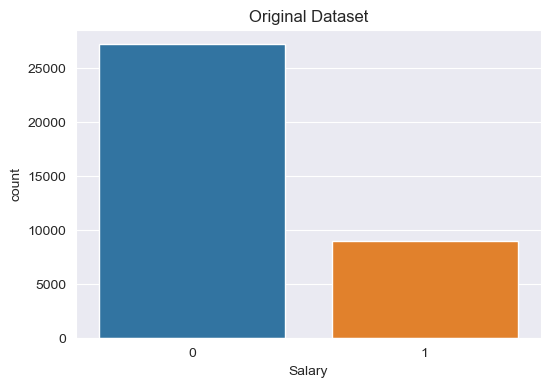

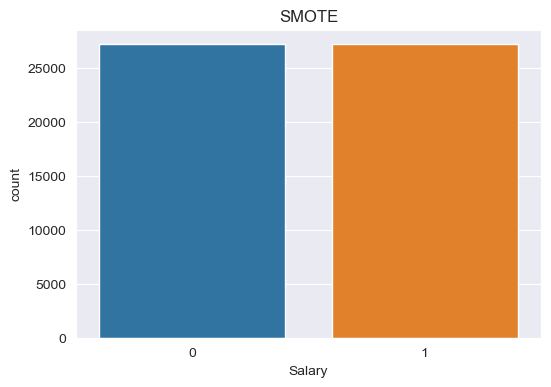

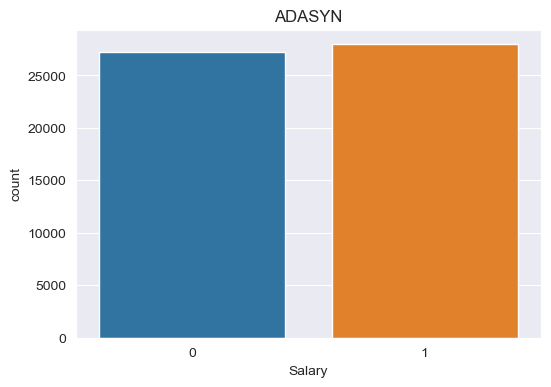

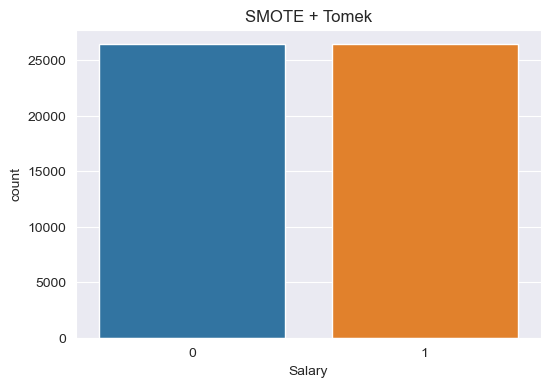

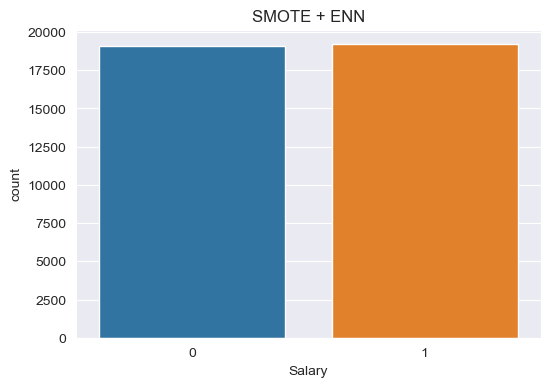

In [76]:
# Function to plot class distribution
def plot_class_distribution(y, title):
    plt.figure(figsize=(6, 4))
    sns.countplot(y)
    plt.title(title)
    plt.show()

# Plotting class distribution before and after each technique
plot_class_distribution(y_train, "Original Dataset")

plot_class_distribution(y_train_Smote_resampled, "SMOTE")

plot_class_distribution(y_train_ada, "ADASYN")

plot_class_distribution(y_train_smtom, "SMOTE + Tomek")

plot_class_distribution(y_train_smenn, "SMOTE + ENN")

## Trying with different type of SVM

In [77]:
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn.datasets import make_classification

In [78]:
# Instantiate different SVM classifiers
svm_classifiers = {
    "SVC": SVC(kernel='rbf', random_state=42),
    "NuSVC": NuSVC(kernel='rbf', random_state=42),
    "LinearSVC": LinearSVC(random_state=42)
}

In [79]:
# Train and evaluate each SVM classifier
for name, clf in svm_classifiers.items():
    print(f"\n{name}:")
    clf.fit(X_train_Smote_resampled, y_train_Smote_resampled)
    y_pred = clf.predict(X_test)
    
    # Model evaluation
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))


SVC:
Confusion Matrix:
[[4575 2231]
 [ 326 1913]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.67      0.78      6806
           1       0.46      0.85      0.60      2239

    accuracy                           0.72      9045
   macro avg       0.70      0.76      0.69      9045
weighted avg       0.82      0.72      0.74      9045


NuSVC:
Confusion Matrix:
[[4868 1938]
 [ 264 1975]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.72      0.82      6806
           1       0.50      0.88      0.64      2239

    accuracy                           0.76      9045
   macro avg       0.73      0.80      0.73      9045
weighted avg       0.84      0.76      0.77      9045


LinearSVC:
Confusion Matrix:
[[2132 4674]
 [  73 2166]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.31      0.47      6806
    

## Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.1, 0.01, 0.001],
    'kernel': ['rbf', 'poly', 'sigmoid']
}

# Instantiate the SVM classifier
svm = SVC(random_state=42)

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=3, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train_Smote_resampled, y_train_Smote_resampled)

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)

# Get the best estimator
best_svm = grid_search.best_estimator_

# Evaluate the best estimator
y_pred_best = best_svm.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best))